In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


# "a" coefficient calculation.
def a(n, min,max, accuracy = 5000):
    a, b = min,max
    dx = (b - a) / accuracy
    integration = 0
    for x in np.linspace(a, b, accuracy):
        integration += f(x) * np.cos((n * np.pi * x) / L)
    integration *= dx
    return (1 / L) * integration

# "b" coefficient calculation.
def b(n, min,max, accuracy = 5000):
    a, b = min,max
    dx = (b - a) / accuracy
    integration = 0
    for x in np.linspace(a, b, accuracy):
        integration += f(x) * np.sin((n * np.pi * x) / L)
    integration *= dx
    return (1 / L) * integration

# Fourier series.   
def Sf(x, min,max,n = 10):
    a0 = a(0, min,max)
    sum = np.zeros(np.size(x))
    for i in np.arange(1, n + 1):
        sum += ((a(i, min,max) * np.cos((i * np.pi * x) / L)) + (b(i, min,max) * np.sin((i * np.pi * x) / L)))
    return (a0 / 2) + sum   

#"f(x)" function definition.
def f(x):

  if x>=0 and x<1:
    y=0
  elif x>=1 and x<2:
    y=x-1
  elif x>=2 and x<=3:
    y=-x+4
  return y 


In [ ]:
# Define "x" range
x = np.linspace(0, 3, 5000)
y=[]
for xx in x:
  y.append(f(xx))
y=np.array(y)  

# Define "T", i.e functions' period.
T = 3
L = (T / 2)

# Define # harmonics
harmonics=3 

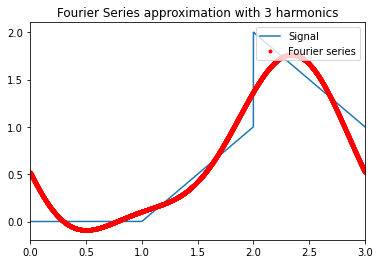

In [ ]:
# Original signal.
plt.plot(x, y, linewidth = 1.5, label = 'Signal')

# Approximation signal (Fourier series coefficients).
plt.plot(x, Sf(x, 0.0,3.0,harmonics), '.', color = 'red', linewidth = 1.5, label = 'Fourier series')
plt.title(f"Fourier Series approximation with {harmonics} harmonics")

# Specify x and y axes limits.
plt.xlim([x.min(), x.max()])
#plt.ylim([y.min(), 1.2*y.max()])
plt.legend(loc = 'upper right', fontsize = '10')
plt.savefig("ex1.png",dpi=500)

In [ ]:
n=harmonics
print("##################################")
for i in range(n+1):
  an=a(i,0,3.0)
  bn=b(i,0,3.0)
  print(f"harmonic {i}: a={np.round(an,3)} and b={np.round(bn,3)}")
print("##################################")

for i in range(n+1):
  an=a(i,0,3.0)
  bn=b(i,0,3.0)
  if i==0:
    print(f"average power harmonic {i}={np.round((an/2)**2,3)}")
  else:
    print(f"average power harmonic {i}={np.round(((an)**2+(bn)**2)/2,3)}")      
print("##################################")

##################################
harmonic 0: a=1.333 and b=0.0
harmonic 1: a=0.048 and b=-0.872
harmonic 2: a=-0.195 and b=-0.14
harmonic 3: a=0.0 and b=0.0
##################################
average power harmonic 0=0.444
average power harmonic 1=0.382
average power harmonic 2=0.029
average power harmonic 3=0.0
##################################
